**PROJECT: Online Retail Sales EDA**

**PROBLEM STATEMENT**

In this project, I am performing Exploratory Data Analysis (EDA) on a real-world E-commerce retail dataset. My goal is to analyze customer purchasing behavior, identify top-selling products, uncover seasonal trends, and segment customers based on their buying patterns. As part of the process, I am also handling common data preprocessing tasks such as dealing with missing values, removing duplicate entries, and managing outliers.

**IMPORT LIBRARIES AND LOAD DATA**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

**DATA EXPLORATION**

In [50]:
# LOAD THE DATASET

sales_df = pd.read_excel('src/online_retail_II.xlsx')
sales_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [51]:
# Data Overview
print("Data Overview:")
print(sales_df.info())

print("\nData Statistics:")
print(sales_df.describe())

# check missing values
print("\nMissing values in each column:")
print(sales_df.isnull().sum())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None

Data Statistics:
            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.

**Initial Observation**

- There are **525461** entries(rows/transactions) and **8** columns(attributes), with missing values in **Description(2928)** and **Customer ID(107927)**.
- There are some negative and extreme values in **Quantity** and **Price** indicating outliers.
- 3 datatypes **object**,**integer**, and **dateTime**.

**DATA CLEANING**

In [52]:
# Handle Duplicates 

# check for duplicates 
print(f"\nNumber of duplicate rows: {sales_df.duplicated().sum()}")

# drop duplicates
sales_df = sales_df.drop_duplicates()

# check for duplicates again
print(f"\nNumber of duplicate rows after dropping: {sales_df.duplicated().sum()}")


Number of duplicate rows: 6865

Number of duplicate rows after dropping: 0


In [53]:
# check for cancelled orders
print(sales_df['Invoice'].astype(str).str.startswith('C').value_counts())
print("\nOriginal rows:", sales_df.shape[0])

# Remove cancelled orders (where Invoice starts with 'C')
sales_df = sales_df[~sales_df['Invoice'].astype(str).str.startswith('C')]
print("After removing cancelled orders:", sales_df.shape[0])

# Remove negative/zero quantity and price
sales_df = sales_df[(sales_df['Quantity'] > 0) & (sales_df['Price'] > 0)]
print("After removing outliers:", sales_df.shape[0])

Invoice
False    508414
True      10182
Name: count, dtype: int64

Original rows: 518596
After removing cancelled orders: 508414
After removing outliers: 504730


In [54]:
# Handle missing values

# Drop rows with missing descriptions
sales_df = sales_df.dropna(subset=['Description'])

# For general sales/product analysis, keeping all data 
sales_df_all = sales_df.copy()

# For customer-based analysis , we drop rows where 'Customer ID' is missing
sales_df_customers = sales_df.dropna(subset=['Customer ID'])

# check again for missing values
print("\nMissing values after handling:")
print(f"All\n{sales_df_all.isnull().sum()}")
print(f"\nCustomer-based Analysis Only - \n{sales_df_customers.isnull().sum()}")

# Check total values after cleaning
print(f"\nTotal rows after cleaning(All):{sales_df_all.shape[0]}")
print(f"Total rows after cleaning(Customer-based):{sales_df_customers.shape[0]}")


Missing values after handling:
All
Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    103814
Country             0
dtype: int64

Customer-based Analysis Only - 
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Total rows after cleaning(All):504730
Total rows after cleaning(Customer-based):400916


**INSIGHTS (AFTER CLEANING)**

- **6865 duplicate rows** were identified and removed to ensure data accuracy.
- **Cancelled orders** (Invoice starting with "C") totaling **10,182** rows were excluded.
- All rows with **negative or zero Quantity and Price** were removed to eliminate invalid and outlier transactions.
- A total of **13,866** rows were dropped during outlier and cancelled order removal, reducing the dataset to **504,730** rows.
- Rows with missing **Description (product name)** were dropped, as product-level insights require product identification.
- For general analysis, rows with missing **Customer ID (103,814 rows)** were retained.
- For customer-based segmentation (like **RFM analysis**), only rows with valid **Customer IDs** were used, leaving **400,916** rows in **sales_df_customers**.
- Final cleaned dataset:
    - **sales_df_all** → **504,730** rows for overall product and sales trends.
    - **sales_df_customers** → **400,916 rows** for accurate customer-level insights.

**EXPLORATORY DATA ANALYSIS (EDA)**

**GENERAL OVERVIEW**

**Q. How many unique products are there ?**

In [55]:
print("Unique Products:", sales_df_all['StockCode'].nunique())

Unique Products: 4251


**Q. What is the total number of transactions?**

In [56]:
print("Total Transactions:", sales_df_all['Invoice'].nunique())

Total Transactions: 20951


**Q. How many unique customers are there?**

In [57]:
print("Number of unique customers:", sales_df_customers['Customer ID'].nunique())

Number of unique customers: 4312


**Q. What countries do the customers belong to?**

In [58]:
print("Countries:", sales_df_all['Country'].nunique())
print("List of countries:\n", sales_df_all['Country'].unique())

Countries: 40
List of countries:
 ['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Denmark' 'Netherlands' 'Poland' 'Channel Islands' 'Spain'
 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden' 'United Arab Emirates'
 'Finland' 'Italy' 'Switzerland' 'Japan' 'Unspecified' 'Nigeria' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland']


**GENERAL OVERVIEW INSIGHTS**

- There are **4251** unique products.
- The total number of transactions(unique invoices) is **20951**.
- There are **4312** unique customers.
- Customers belong to **40** different countries as listed above.

**PRODUCT ANALYSIS**

**Q. What are the top 10 selling products by quantity?**


Top 10 selling products
Description
WHITE HANGING HEART T-LIGHT HOLDER    58691
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54947
BROCADE RING PURSE                    48374
PACK OF 72 RETRO SPOT CAKE CASES      46728
ASSORTED COLOUR BIRD ORNAMENT         45228
60 TEATIME FAIRY CAKE CASES           36348
PACK OF 60 PINK PAISLEY CAKE CASES    31805
JUMBO BAG RED RETROSPOT               30746
SMALL POPCORN HOLDER                  29773
STRAWBERRY CERAMIC TRINKET BOX        27059
Name: Quantity, dtype: int64


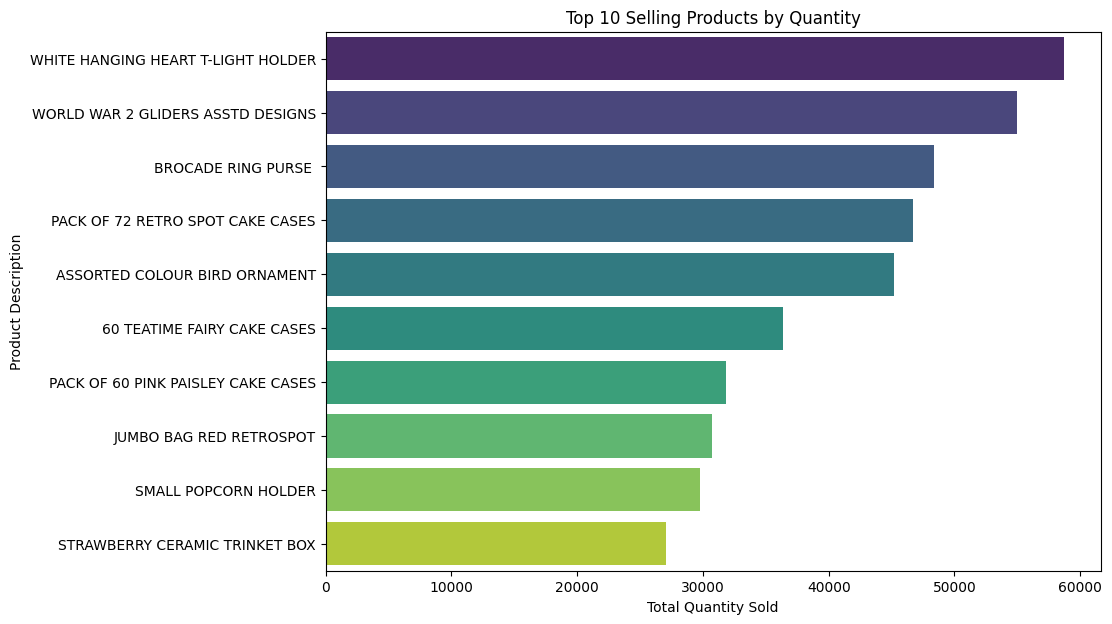

In [59]:
top_products_by_quantity = sales_df_all.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(f"\nTop 10 selling products\n{top_products_by_quantity}")

plt.figure(figsize=(10, 7))
sns.barplot(x=top_products_by_quantity.values,
            y=top_products_by_quantity.index,
            hue=top_products_by_quantity.index,
            palette='viridis',
            legend=False)
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

**Q. What are the top 10 revenue-generating products?**


Top 10 revenue-generating products
Description
REGENCY CAKESTAND 3 TIER               169912.76
WHITE HANGING HEART T-LIGHT HOLDER     160345.63
ASSORTED COLOUR BIRD ORNAMENT           72890.19
PAPER CHAIN KIT 50'S CHRISTMAS          58127.30
JUMBO BAG RED RETROSPOT                 56480.46
PARTY BUNTING                           49664.12
ROTATING SILVER ANGELS T-LIGHT HLDR     47954.49
EDWARDIAN PARASOL NATURAL               36925.26
JUMBO BAG STRAWBERRY                    36732.16
VINTAGE UNION JACK BUNTING              36023.71
Name: Revenue, dtype: float64


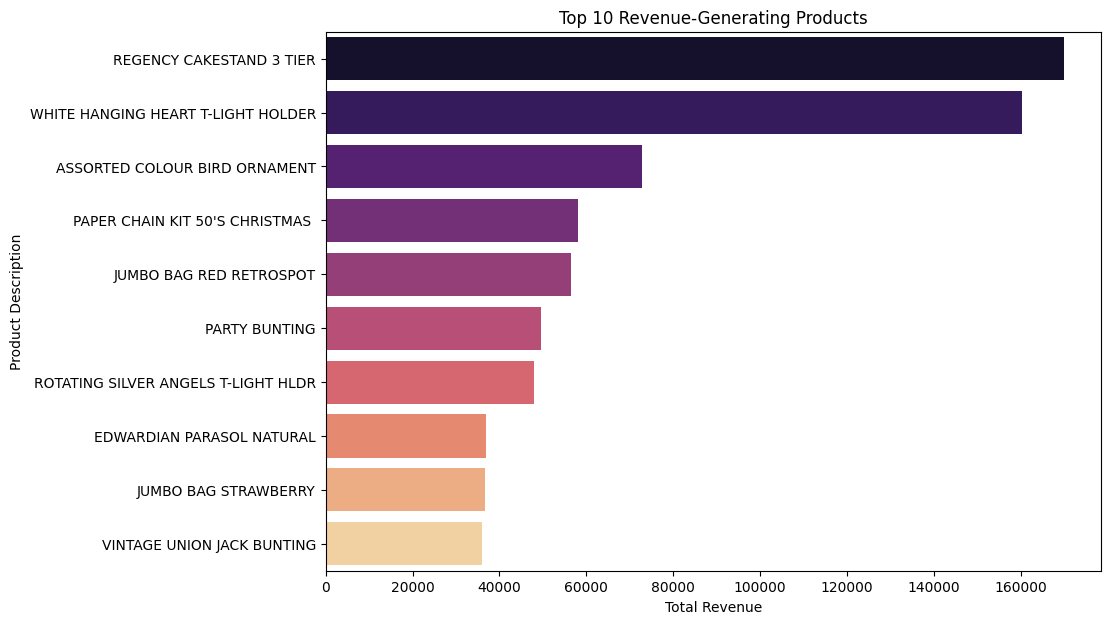

In [60]:
sales_df_all['Revenue'] = sales_df_all['Quantity'] * sales_df_all['Price']
non_products = ['Manual', 'POSTAGE', 'DOTCOM POSTAGE']
sales_df_filtered = sales_df_all[~sales_df_all['Description'].isin(non_products)]
top_products_by_revenue = sales_df_filtered.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print(f"\nTop 10 revenue-generating products\n{top_products_by_revenue}")

plt.figure(figsize=(10, 7))
sns.barplot(x=top_products_by_revenue.values,
            y=top_products_by_revenue.index,
            hue=top_products_by_revenue.index,
            palette='magma',
            legend=False)
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.show()

**Q. Which products have negative or zero unit prices?**

In [61]:
products_with_invalid_price = sales_df_all[sales_df_all['Price'] <= 0]['Description'].unique()
products_with_invalid_price

array([], dtype=object)

**PRODUCT ANALYSIS INSIGHTS**

- **WHITE HANGING HEART T-LIGHT HOLDER** was the best-selling product with **58,691** units sold, showing high customer demand.

- Other top-selling products include **WORLD WAR 2 GLIDERS ASSTD DESIGNS, BROCADE RING PURSE, and RETRO SPOT CAKE CASES**, reflecting the popularity of decorative and gift-oriented items.

- In terms of revenue, the top contributor was **REGENCY CAKESTAND 3 TIER**, generating **169,912**.76, followed closely by **WHITE HANGING HEART T-LIGHT HOLDER** with **160,345.63**, making it both a high-volume and high-revenue item.

- No products with zero or negative unit prices were found in the final dataset, as such entries were cleaned and removed during the **preprocessing stage** to ensure analysis accuracy.

**CUSTOMER ANALYSIS**

**Q. Which customers bought the most products?**


Top 10 Customers by Quantity Purchased
Customer ID
13902.0    220600
14646.0    170278
13694.0    125893
18102.0    124216
14156.0    108105
14277.0     87830
13687.0     87167
17940.0     75825
14911.0     69709
16754.0     63551
Name: Quantity, dtype: int64


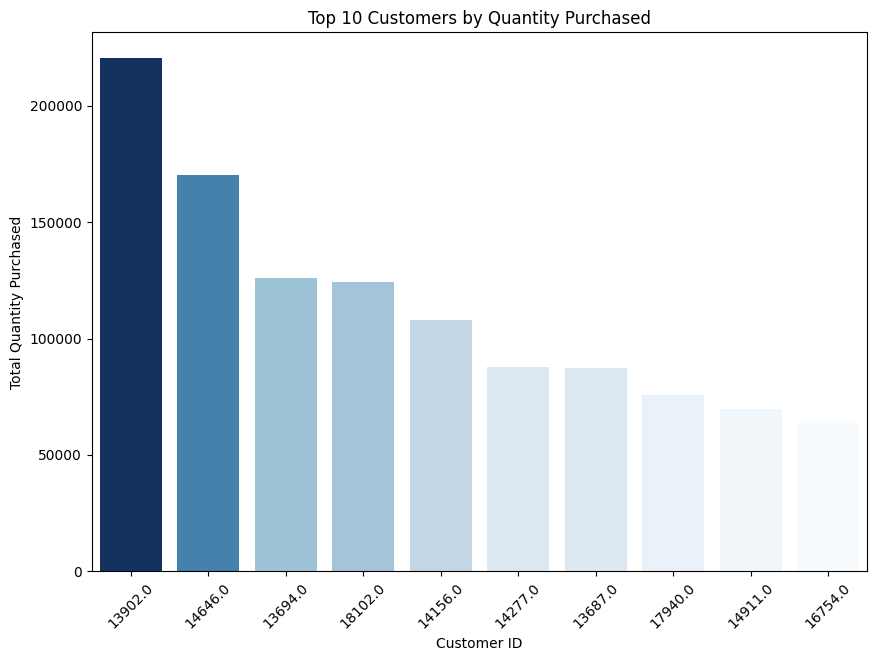

In [62]:
top_customers_by_product_qty = sales_df_customers.groupby('Customer ID')['Quantity'].sum().sort_values(ascending=False).head(10)
print(f"\nTop 10 Customers by Quantity Purchased\n{top_customers_by_product_qty}")

plt.figure(figsize=(10,7))
sns.barplot(x=top_customers_by_product_qty.index.astype(str),
            y=top_customers_by_product_qty.values,
            hue=top_customers_by_product_qty.values,
            palette='Blues',
            legend=False)
plt.title("Top 10 Customers by Quantity Purchased")
plt.xlabel("Customer ID")
plt.ylabel("Total Quantity Purchased")
plt.xticks(rotation=45)
plt.show()

**Q. What is the distribution of purchases per customer?**

Purchase Distribution by Customer:
count    4312.000000
mean        4.455705
std         8.170213
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       205.000000
Name: Invoice, dtype: float64


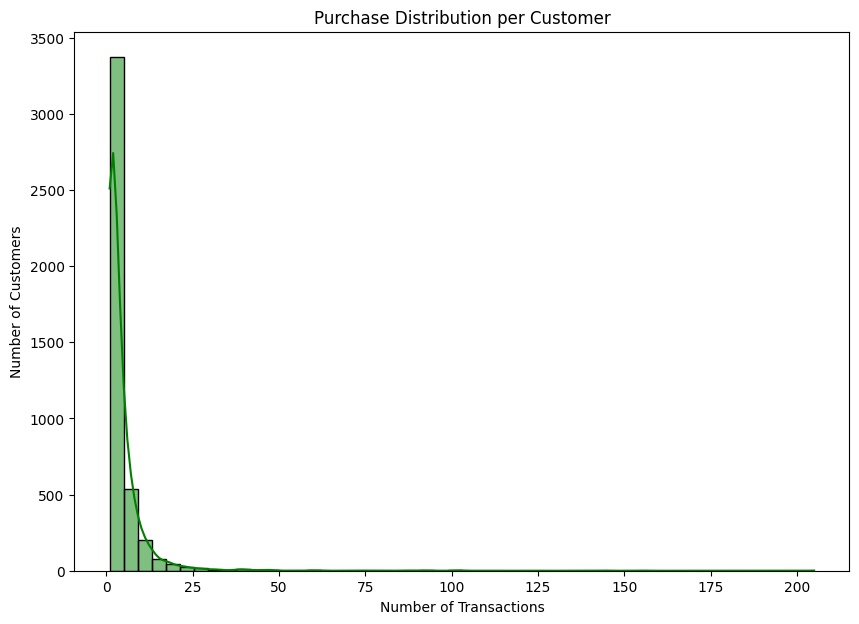

In [63]:
purchase_distribution = sales_df_customers.groupby('Customer ID')['Invoice'].nunique()
print(f"Purchase Distribution by Customer:\n{purchase_distribution.describe()}")

plt.figure(figsize=(10,7))
sns.histplot(purchase_distribution, bins=50, kde=True, color='green')
plt.title("Purchase Distribution per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.show()

**Q. Are there any loyal customers?**

In [64]:
loyal_customers = sales_df_customers['Customer ID'].value_counts().head(10)
print(f"loyal_customers\n{loyal_customers}")

loyal_customers
Customer ID
14911.0    5568
17841.0    4944
14606.0    3802
14156.0    2646
12748.0    2531
17850.0    2499
16549.0    2168
15311.0    2038
14646.0    1773
14527.0    1725
Name: count, dtype: int64


**CUSTOMER ANALYSIS INSIGHTS**

- **Customer ID 13902.0** purchased the highest total quantity **(220,600 units)**, followed by **14646.0 and 13694.0**, indicating strong repeat purchase behavior by a small group of high-volume buyers.

- The **top 10 customers** contributed significantly more in quantity compared to others, suggesting a skewed sales distribution, where a few loyal buyers drive a large share of sales.

- The **purchase distribution** histogram shows that:
    - Most customers made only **1 to 2** purchases.
    - The median number of transactions is **2**, and **75%** of customers made **5 or fewer** transactions.

- A few customers made up to **205** transactions, highlighting the presence of very high-frequency buyers.

- Based on frequency of appearance in the dataset, **Customer ID 14911.0** is the **most loyal**, appearing in **5,568 records**, followed by **17841.0 and 14606.0**.

- This analysis confirms a classic **long-tail pattern**, where most customers are occasional buyers, while a small core group drives repeat sales and revenue.

**COUNTRY ANALYSIS**

**Q. Which countries have the highest number of orders?**


Countries with Highest Number of Orders
Country
United Kingdom    19290
EIRE                348
Germany             347
France              241
Netherlands         135
Sweden               69
Spain                66
Belgium              52
Portugal             41
Switzerland          40
Name: Invoice, dtype: int64


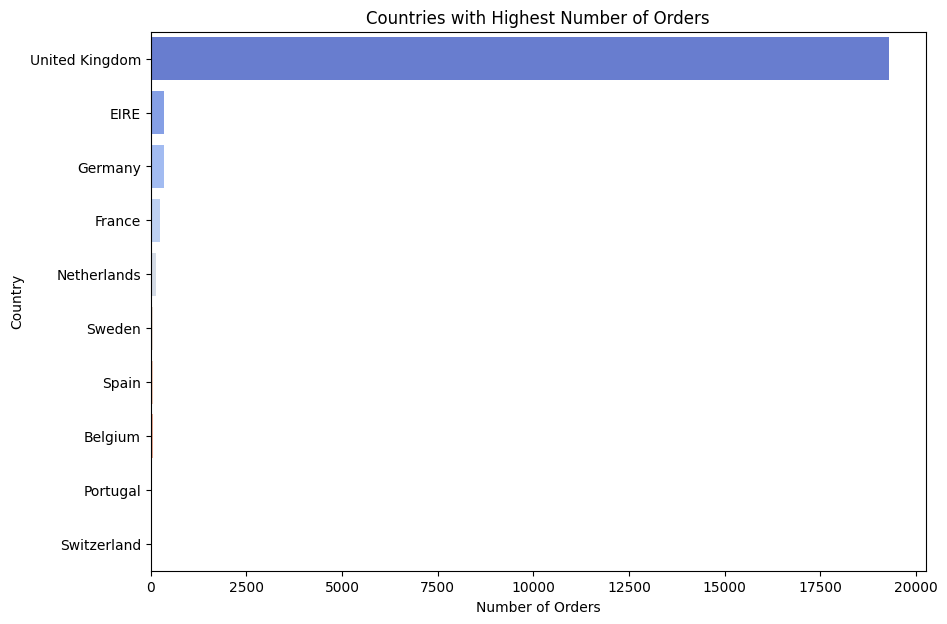

In [65]:
highest_orders_countries = sales_df_all.groupby('Country')['Invoice'].nunique().sort_values(ascending=False).head(10)
print(f"\nCountries with Highest Number of Orders\n{highest_orders_countries}")

plt.figure(figsize=(10, 7))
sns.barplot(x=highest_orders_countries.values,
            y=highest_orders_countries.index,
            hue=highest_orders_countries.index,
            palette='coolwarm',
            legend=False)
plt.title('Countries with Highest Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.show()

**Q. Revenue comparison across countries**


Top 10 Countries by Revenue
Country
United Kingdom    8812311.833
EIRE               380909.570
Netherlands        268784.350
Germany            202025.391
France             147103.140
Sweden              53501.990
Denmark             50906.850
Spain               47568.650
Switzerland         43921.390
Australia           31446.800
Name: Revenue, dtype: float64


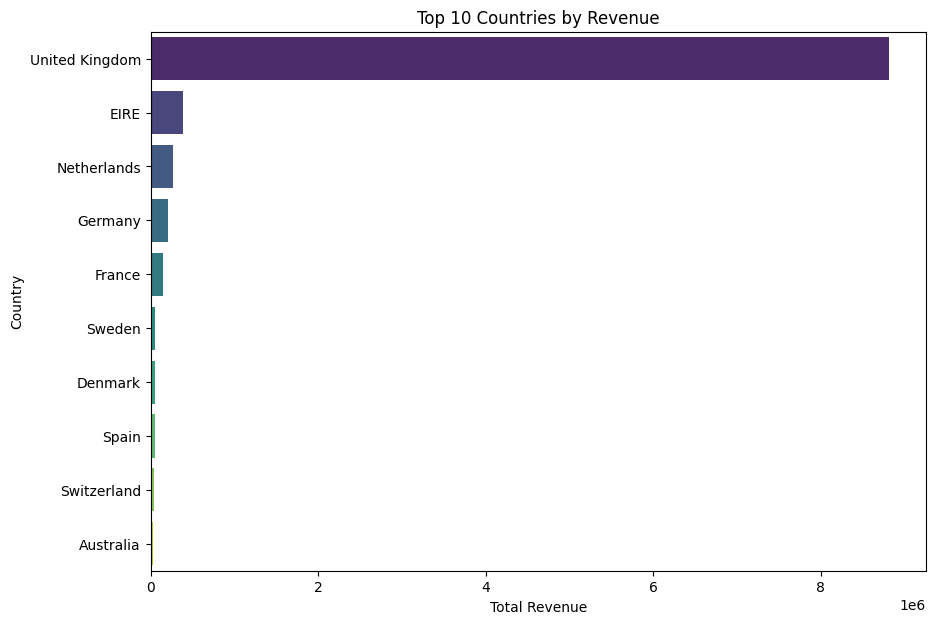

In [66]:
revenue_across_countries = sales_df_all.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
print(f"\nTop 10 Countries by Revenue\n{revenue_across_countries}")

plt.figure(figsize=(10, 7))
sns.barplot(x=revenue_across_countries.values,
            y=revenue_across_countries.index,
            hue=revenue_across_countries.index,
            palette ='viridis',
            legend=False)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

**COUNTRY ANALYSIS INSIGHTS**

- **UK** is the primary market both in terms of **order volume** and **revenue**.
- Some countries like **Australia and Denmark** appear in **revenue top 10** but not in **order top 10**, possibly due to higher order value per invoice.

**TIME SERIES AND SEASONAL TRENDS**

**Q. What are the monthly sales trends?**


Monthly Sales Data:
  YearMonth     Revenue
0   2009-12  822483.950
1   2010-01  651155.112
2   2010-02  551504.726
3   2010-03  830915.261
4   2010-04  678875.252
5   2010-05  657705.500
6   2010-06  749537.310
7   2010-07  648810.270
8   2010-08  695251.910
9   2010-09  921696.991


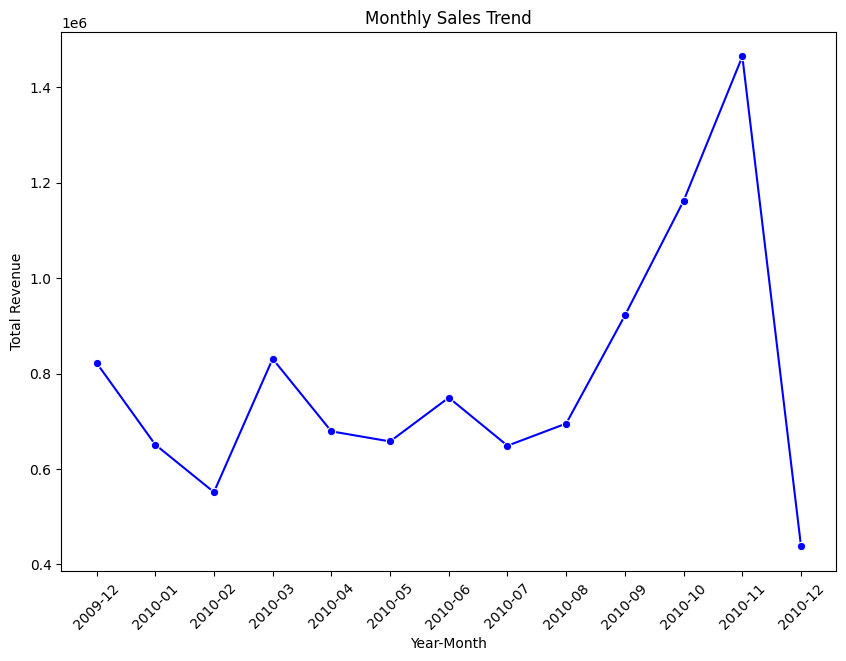

In [67]:
sales_df_all['YearMonth'] = sales_df_all['InvoiceDate'].dt.to_period('M')
monthly_sales = sales_df_all.groupby('YearMonth')['Revenue'].sum().reset_index()
print(f"\nMonthly Sales Data:\n{monthly_sales.head(10)}")

monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

plt.figure(figsize=(10, 7))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Revenue', marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.show()

**Q. What are the daily or weekly patterns of transactions?**

Daily patterns of Transactions
DayOfWeek
Monday       3327
Tuesday      3821
Wednesday    3738
Thursday     4291
Friday       3025
Saturday       30
Sunday       2719
Name: Invoice, dtype: int64


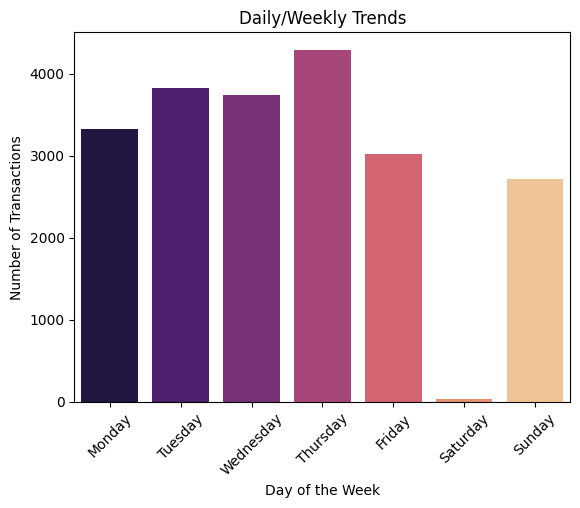

In [68]:
sales_df_all['DayOfWeek'] = sales_df_all['InvoiceDate'].dt.day_name()

# Daily order count
daily_orders = sales_df_all.groupby('DayOfWeek')['Invoice'].nunique().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
print(f"Daily patterns of Transactions\n{daily_orders}")

plt.Figure(figsize=(10, 7))
sns.barplot(x=daily_orders.index, 
            y=daily_orders.values,
            hue=daily_orders.index,
            palette='magma',
            legend=False)
plt.title('Daily/Weekly Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

**Q. Identify peak sales months and slow seasons.**

In [69]:
top_months = monthly_sales.sort_values(by='Revenue', ascending=False).head(3)
slow_months = monthly_sales.sort_values(by='Revenue').head(3)

print(f"\nTop 3 Months by Revenue(Peak):\n{top_months}")
print(f"\nSlowest 3 Months by Revenue(Slow season):\n{slow_months}")


Top 3 Months by Revenue(Peak):
   YearMonth      Revenue
11   2010-11  1464293.142
10   2010-10  1161902.220
9    2010-09   921696.991

Slowest 3 Months by Revenue(Slow season):
   YearMonth     Revenue
12   2010-12  437631.020
2    2010-02  551504.726
7    2010-07  648810.270


**TIME SERIES & SEASONAL TREANDS INSIGHTS**

- **Monthly Sales Trends** show fluctuations throughout the year, with a general increase toward the end of the year(2010).
- **Peak sales months** are **September to November** , indicating ideal time for marketing and promotions.
- **Slow seasons** appear in **Feb, July, and Dec**, which may require targeted strategies to boost sales.
- **Weekdays**, especially **Tuesday to Thursday**, see the highest transaction volume — good for scheduling campaigns or launches.
- **Weekends**, especially **Saturday**, are extremely low in sales — indicating low customer activity or possibly no business operations.

**RFM (RECENCY, FREQUENCY, MONETARY) ANALYSIS**

In [70]:
from datetime import timedelta
# Reference date (assumed to be 1 day after last transaction)
ref_date = sales_df_customers['InvoiceDate'].max() + timedelta(days=1)

sales_df_customers['Revenue'] = sales_df_customers['Quantity'] * sales_df_customers['Price']
# RFM calculation
rfm = sales_df_customers.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days, # Recency
    'Invoice': 'nunique', # Frequency
    'Revenue': 'sum' # Monetary value
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# RFM score (Quantile binning)
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

print(f"\nRFM Analysis:\n{rfm.head()}")
print(f"\nRFM Score Distribution:\n{rfm['RFM_Score'].describe()}")

C:\Users\HP\AppData\Local\Temp\ipykernel_10796\2053628425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_customers['Revenue'] = sales_df_customers['Quantity'] * sales_df_customers['Price']



RFM Analysis:
   CustomerID  Recency  Frequency  Monetary R_score F_score M_score RFM_Score
0     12346.0      165         11    372.86       1       4       2       142
1     12347.0        3          2   1323.32       4       2       3       423
2     12348.0       74          1    222.16       2       1       1       211
3     12349.0       43          3   2671.14       3       3       4       334
4     12351.0       11          1    300.93       4       1       1       411

RFM Score Distribution:
count     4312
unique      62
top        444
freq       457
Name: RFM_Score, dtype: object


**SEGMENTING CUSTOMERS (RFM)**


Customer Segmentation:
Segment
Others            3855
Best Customers     457
Name: count, dtype: int64


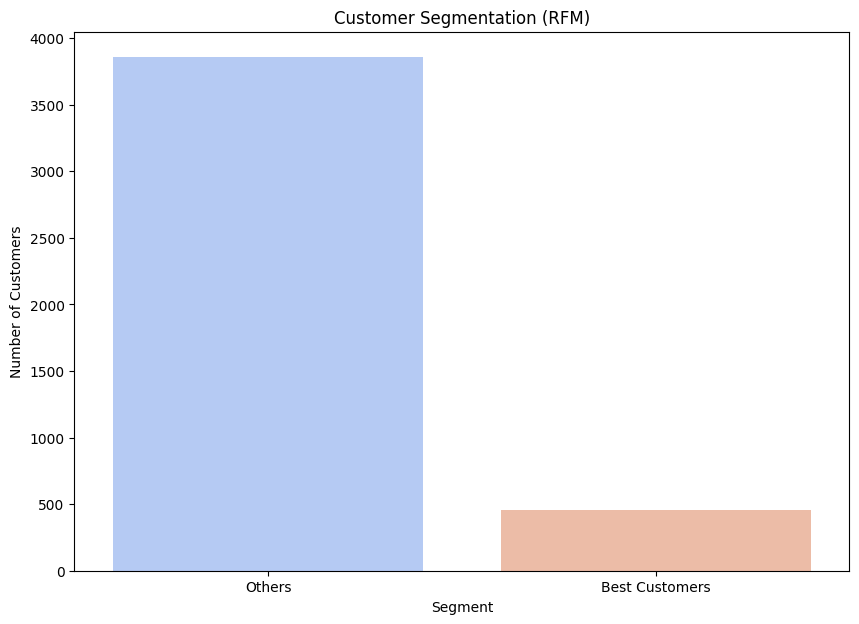

In [71]:
# Assigning segments
def segment_customer(df):
    if df['RFM_Score'] == '444':
        return 'Best Customers'
    elif df['R_score'] == '4':
        return 'Recent Customers'
    elif df['F_score'] == '4':
        return 'Frequent Buyers'
    elif df['M_score'] == '4':
        return 'Big Spenders'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
print(f"\nCustomer Segmentation:\n{rfm['Segment'].value_counts()}")

plt.figure(figsize=(10, 7))
sns.countplot(x='Segment',
              data=rfm,
              order=rfm['Segment'].value_counts().index,
              hue='Segment',  
              palette='coolwarm',
              legend=False)   
plt.title('Customer Segmentation (RFM)')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

**RFM Analysis – Key Insights**

- A total of **4,312 customers** were analyzed using RFM (Recency, Frequency, Monetary) segmentation, revealing **62 unique score combinations** and a wide range of customer behaviors.

- The most common and most valuable group is the **'444' RFM segment**, representing **457 Best Customers (~10.6%)** who purchased recently, frequently, and spent the most — ideal for loyalty programs and exclusive offers.

- The remaining **3,855 customers (~89.4%)** fall into lower RFM segments with **lower recency, frequency, or spending,** indicating strong potential for **reactivation and engagement**.

- Most customers made only **one purchase**, highlighting the need for strategies like **(follow)-up emails or loyalty incentives** to encourage repeat buying.

- A small group of **high-spending customers (high monetary score)** stands out and can be targeted with **premium products or early access promotions**.

**EXPORTING DATASETS**

In [ ]:
# Export product-level dataset
sales_df_all.to_csv("sales_data_all.csv", index=False)

# Export customer-level dataset
sales_df_customers.to_csv("sales_data_customers.csv", index=False)
